<a href="https://colab.research.google.com/github/chinhegde/Data-Wrangling-Practice/blob/main/Twitch_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chinmayi13hegde","key":"ac2651e09a4158951c9e251747d823b3"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [44]:
! kaggle datasets download -d aayushmishra1512/twitchdata

Dataset URL: https://www.kaggle.com/datasets/aayushmishra1512/twitchdata
License(s): CC0-1.0
twitchdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [45]:
! unzip twitchdata.zip

Archive:  twitchdata.zip
replace twitchdata-update.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
df = pd.read_csv('/content/twitchdata-update.csv')

In [78]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [80]:
# Number of channels

df['Channel'].nunique()

1000

In [81]:
# Number of followers

# Maximum
print("Max:", max(df['Followers']))

# Minimum
print("Min:", min(df['Followers']))

# Average
print("Avg:", df['Followers'].sum()/len(df['Channel']))

# Median
print("Median: ", df[['Followers']].median())

Max: 8938903
Min: 3660
Avg: 570054.068
Median:  Followers    318063.0
dtype: float64


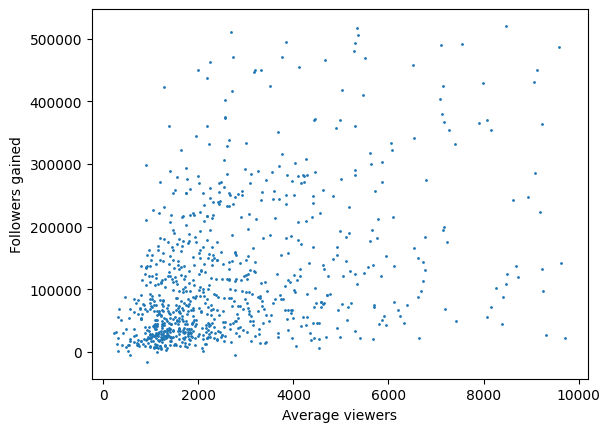

In [52]:
Q1_avg_viewers = df['Average viewers'].quantile(0.25)
Q3_avg_viewers = df['Average viewers'].quantile(0.75)
IQR_avg_viewers = Q3_avg_viewers - Q1_avg_viewers

Q1_followers_gained = df['Followers gained'].quantile(0.25)
Q3_followers_gained = df['Followers gained'].quantile(0.75)
IQR_followers_gained = Q3_followers_gained - Q1_followers_gained

mask_avg_viewers = (df['Average viewers'] >= (Q1_avg_viewers - 1.5 * IQR_avg_viewers)) & (df['Average viewers'] <= (Q3_avg_viewers + 1.5 * IQR_avg_viewers))
mask_followers_gained = (df['Followers gained'] >= (Q1_followers_gained - 1.5 * IQR_followers_gained)) & (df['Followers gained'] <= (Q3_followers_gained + 1.5 * IQR_followers_gained))

filtered_df = df[mask_avg_viewers & mask_followers_gained]

plt.scatter(filtered_df['Average viewers'], filtered_df['Followers gained'], s = 1)
plt.xlabel('Average viewers')
plt.ylabel('Followers gained')
plt.show()



In [53]:
# How can you filter the DataFrame to show only partnered streamers?

df[df['Partnered']==True][['Channel']]

,Channel
0,xQcOW
1,summit1g
2,Gaules
3,ESL_CSGO
4,Tfue
...,...
995,LITkillah
996,빅헤드 (bighead033)
997,마스카 (newmasca)
998,AndyMilonakis


In [54]:
# How can you sort the DataFrame by the column 'Followers gained' in descending order?

df.sort_values(by = 'Followers gained', ascending=False)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
25,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish
51,Bugha,1324519320,100470,66311,12982,2942212,2220765,49441744,True,False,English
90,pokimane,964334055,56505,112160,16026,5367605,2085831,45579002,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
758,voicetv,162510660,514845,1874,314,3660,1328,4001475,True,False,Thai
779,Dyrus,158999070,138300,11338,1123,1474090,111,3724340,True,True,English
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
499,Amaz,235255500,84525,12652,2764,915023,-5405,4237993,True,False,English


In [82]:
# How can you calculate the total 'Watch time(Minutes)' for all streamers?

print("Total minutes:", df['Watch time(Minutes)'].sum()) # Minutes
print("Total Hours (in Millions):", df['Watch time(Minutes)'].sum()/(1200*1000000)) # Hours

Total minutes: 418427930130
Total Hours (in Millions): 348.689941775


In [56]:
# How can you group the DataFrame by 'Language' and calculate the average 'Average viewers' for each language?

df['Language'].value_counts()
df[['Language','Average viewers']].groupby('Language').mean()

,Average viewers
Language,
Arabic,5682.200000
Chinese,3424.800000
Czech,1827.666667
English,5112.814433
Finnish,1027.000000
French,3506.530303
German,4278.183673
Greek,1961.000000
Hungarian,2140.500000


In [57]:
# How can you create a new column 'Viewers per minute' by dividing 'Watch time(Minutes)' by 'Stream time(minutes)'?

df['Viewers per minute'] = df['Watch time(Minutes)']/df['Stream time(minutes)']
df['Viewers per minute'].head()

,Viewers per minute
0,28785.885017
1,28755.350846
2,10954.414910
3,7668.555916
4,29686.237021


In [58]:
# How can you find the streamer with the maximum 'Peak viewers'

df[df['Peak viewers'] == df['Peak viewers'].max()][['Channel']]

,Channel
12,Riot Games (riotgames)


In [59]:
# How can you replace the boolean values in the 'Mature' column with 'Yes' for True and 'No' for False?

df['Mature'].value_counts()

df['Mature'].replace({True: 'Y', False: 'N'}).head()

,Mature
0,N
1,N
2,Y
3,N
4,N


In [60]:
# How can you filter the DataFrame to show streamers who gained more than 1000 followers and are marked as 'Mature'?

df[(df['Followers gained'] > 1000) & (df['Mature'] == True)][['Channel']].head()

,Channel
2,Gaules
10,TimTheTatman
15,MontanaBlack88
16,sodapoppin
24,TheRealKnossi


In [61]:
# How can you drop rows where the 'Watch time(Minutes)' is less than 200 M ?

df.drop(df[df['Watch time(Minutes)'] < 200000000].index)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Viewers per minute
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,28785.885017
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,28755.350846
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,10954.414910
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,7668.555916
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,29686.237021
...,...,...,...,...,...,...,...,...,...,...,...,...
596,Pieface23,201823125,93360,14072,2149,238155,127444,2037389,True,False,English,2161.772976
597,CurtisRyan,201233880,162660,7245,1205,65688,33141,3760730,True,True,English,1237.144227
598,CalebDMTG,200582400,121635,5446,1608,71327,9005,1563033,True,False,English,1649.051671
599,MarkiLokurasY,200552295,71070,26329,2714,923377,417223,7000112,True,False,Spanish,2821.898058


In [83]:
# How can you convert the 'Watch time(Minutes)' column from minutes to hours?

df['watch_time_hours'] = df['Watch time(Minutes)']/60
df.drop(['Watch time(Minutes)'], axis = 1, inplace = True)

In [63]:
# How can you filter the DataFrame to show only streamers who have more followers than average?

len(df[df['Followers'] > df['Followers'].mean()]['Channel'])
df[df['Followers'] > df['Followers'].mean()]['Channel'].head()

,Channel
0,xQcOW
1,summit1g
2,Gaules
3,ESL_CSGO
4,Tfue


In [64]:
# How can you calculate the percentage increase in followers for each streamer and add it as a new column?

df['Followers gained'].head()/df['Followers'].head()*100

,0
0,53.439641
1,25.803050
2,57.918009
3,17.845698
4,23.139573


<ipython-input-65-04076cb495fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bins'] = pd.cut(filtered_df['Average viewers'], bins=10)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(225.513, 1183.7]'),
  Text(1, 0, '(1183.7, 2132.4]'),
  Text(2, 0, '(2132.4, 3081.1]'),
  Text(3, 0, '(3081.1, 4029.8]'),
  Text(4, 0, '(4029.8, 4978.5]'),
  Text(5, 0, '(4978.5, 5927.2]'),
  Text(6, 0, '(5927.2, 6875.9]'),
  Text(7, 0, '(6875.9, 7824.6]'),
  Text(8, 0, '(7824.6, 8773.3]'),
  Text(9, 0, '(8773.3, 9722.0]')])

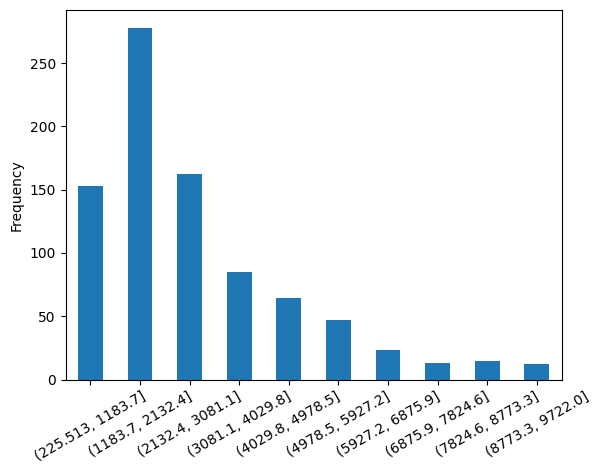

In [65]:
# How can you create a new column that categorizes streamers into 'High', 'Medium', and 'Low' based on their 'Average viewers'?

filtered_df['bins'] = pd.cut(filtered_df['Average viewers'], bins=10)

filtered_df['bins'].value_counts().sort_index().plot.bar()

filtered_df['Average viewers'].plot.hist(bins=10)
plt.xticks(rotation=30)

<Axes: >

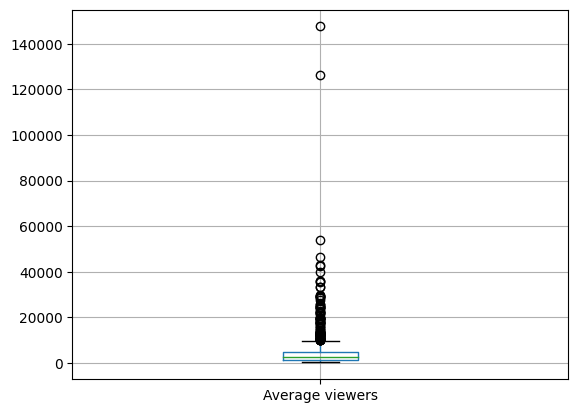

In [66]:
df.boxplot(column=['Average viewers'])

In [84]:
Q1 = df['Average viewers'].quantile(0.25)
Q3 = df['Average viewers'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['Average viewers'] >= lower_bound) & (df['Average viewers'] <= upper_bound)]


<Axes: >

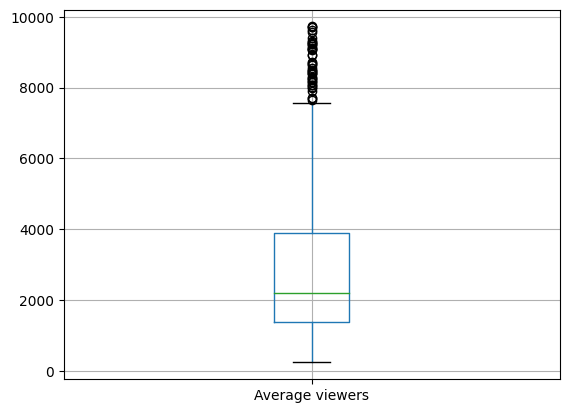

In [68]:
filtered_df.boxplot(column=['Average viewers'])


In [85]:
# How can you calculate the median 'Followers gained' for streamers who are partnered?

df[df['Partnered'] == True]['Followers gained'].median()

99444.0

In [86]:
# How can you calculate the correlation between 'Watch time(Minutes)' and 'Followers gained'?

df['watch_time_hours'].corr(df['Followers gained'])

0.5146475645308869

In [71]:
# How can you create a pivot table to show the average 'Peak viewers' for each 'Language'?

pd.pivot_table(df[['Language', 'Peak viewers']], values='Peak viewers', index=['Language'], aggfunc="mean")

,Peak viewers
Language,
Arabic,58281.400000
Chinese,13104.366667
Czech,9918.500000
English,41639.719588
Finnish,9676.000000
French,33865.409091
German,31274.734694
Greek,6289.000000
Hungarian,24780.000000


In [72]:
# How can you find the top 10 streamers by 'Views gained'?

df[['Channel', 'Views gained']].sort_values(by = 'Views gained', ascending = False).head(10)

,Channel,Views gained
7,Fextralife,670137548
703,Igromania,115312954
3,ESL_CSGO,106546942
2,Gaules,102611607
0,xQcOW,93036735
399,HGmony,90310969
1,summit1g,89705964
994,Destructoid,87603521
205,Chess,84500786
4,Tfue,78998587


In [73]:
# How can you find the top 5 languages by the number of streamers?

grouped = df.groupby(by='Language').count()[['Channel']]
grouped.sort_values(by = 'Channel', ascending = False).head()

,Channel
Language,
English,485
Korean,77
Russian,74
Spanish,68
French,66


In [74]:
df[['Language']].nunique()

,0
Language,21


Text(0.5, 1.0, 'Number of Streamers for Each Unique Value in the "Mature" Column')

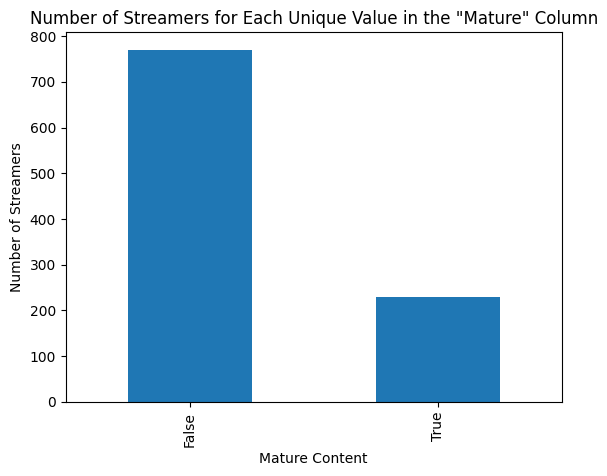

In [88]:
# How can you create a bar plot of the number of streamers for each unique value in the 'Mature' column?

df['Mature'].value_counts().plot(kind='bar')
plt.xlabel('Mature Content')
plt.ylabel('Number of Streamers')
plt.title('Number of Streamers for Each Unique Value in the "Mature" Column')